In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('merged_data.csv')
df.head()

,Unnamed: 0,DATE,Total Power (max),Total Power (min),Total Power (avg),Total Power (samp),Total Power (trimmed),HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,...,FG,FZ,GS,HZ,MI,PL,RA,SN,TS,VCTS
0,0,2019-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,9.0,17.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-03-01 01:00:00,0.0,0.0,0.0,0.0,0.0,9.0,17.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2019-03-01 02:00:00,0.0,0.0,0.0,0.0,0.0,9.0,17.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2019-03-01 03:00:00,0.0,0.0,0.0,0.0,0.0,10.0,19.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2019-03-01 04:00:00,0.0,0.0,0.0,0.0,0.0,8.0,16.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
filtered_cols = [
    'DATE',
    'Total Power (max)',
    'Total Power (avg)',
    'HourlyDryBulbTemperature',
    'HourlyWetBulbTemperature',
    'HourlyRelativeHumidity'
]
hourly = df[filtered_cols]

daily = hourly.drop(columns = ['DATE']).copy()
daily['date'] = pd.to_datetime(hourly['DATE'].astype(str), format='%Y-%m-%d %H:%M:%S').dt.date

colList = daily.copy().columns[:-1] 

In [3]:
groupby = daily.groupby('date').describe()
groupby.head()

Total Power (max)                                     \
                       count mean  std  min  25%  50%  75%  max   
date                                                              
2019-03-01              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-02              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-03              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-04              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-05              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           Total Power (avg)       ... HourlyWetBulbTemperature        \
                       count mean  ...                      75%   max   
date                               ...                                  
2019-03-01              24.0  0.0  ...                    28.00  31.0   
2019-03-02              24.0  0.0  ...                    31.00  32.0   
2019-03-03              24.0  0.0  ...                    26.00  27.0   
2019-03-04              24.0  0.0  ...                    18.25  23.0   
2019-03-05              24.0  0.0  ...                    14.00  15.0   

           HourlyRelativeHumidity                                           \
                            count       mean        std   min    25%   50%   
date                                                                         
2019-03-01                   24.0  66.625000  10.503881  44.0  60.25  70.0   
2019-03-02                   24.0  79.041667   6.772574  64.0  75.00  82.0   
2019-03-03                   24.0  70.666667  11.675566  51.0  59.50  75.0   
2019-03-04                   24.0  64.291667  11.547554  50.0  54.75  61.5   
2019-03-05                   24.0  61.916667   9.249755  47.0  53.50  63.5   

                         
              75%   max  
date                     
2019-03-01  75.00  81.0  
2019-03-02  85.00  85.0  
2019-03-03  78.75  85.0  
2019-03-04  71.75  84.0  
2019-03-05  70.00  74.0  

[5 rows x 40 columns]

In [4]:
def getWeekdays(df, datecol):
    weekdays = []
    for i, row in df.iterrows():
        weekdays.append(row[datecol].weekday())

    df['weekday'] = weekdays

In [5]:
def runModel(df, model, predictorVar = 'Total Power (max)', 
             dropCols = ['date', 'Total Power (max)']):
    X = df.drop(columns = dropCols)
    Y = df[predictorVar]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

    #print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

    #rf = RandomForestRegressor()
    model.fit(X_train, Y_train)
    
    rsq = model.score(X_test, Y_test)
    rmse = math.sqrt(metrics.mean_squared_error(Y_test, model.predict(X_test)))
    mae = metrics.mean_absolute_error(Y_test, model.predict(X_test))
    
    print("R Squared Score: {:.4f}".format(rsq))
    print("Root Mean Squared Error: {:.2f}".format(rmse))
    print("Mean Absolute Error: {:.2f}".format(mae))

    #importance = pd.DataFrame({'col_name': rf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)
    #importance['col_name'] = 100*importance['col_name']
    #print(importance[:10])
    
    return mae, rmse, rsq

In [6]:
def resetDaily(groupbyDF = groupby, collist = colList, ndays = 1, trainDays = 7, 
               model = RandomForestRegressor()):
    parameters = ['min', 'max', 'mean']
    dailyCols = ['date']
    dailyData = {'date':list(groupby.index)}

    for column in collist:
        if(column == 'Total Power (max)'):
            dailyData['Total Power (max)'] = list(groupby[column]['max'])
        elif(column == 'Total Power (avg)'):
            dailyData['Total Power (avg)'] = list(groupby[column]['mean'])
        else:                                     
            for param in parameters:
                dailyData[param + "_" + column] = list(groupby[column][param])

    daily = pd.DataFrame(dailyData)
    
    nday_cols = [
        'mean_HourlyDryBulbTemperature',
        'mean_HourlyWetBulbTemperature',
        'max_HourlyDryBulbTemperature',
        'max_HourlyWetBulbTemperature',
        'Total Power (avg)', 'Total Power (max)'
    ]
                                                                                        
    if(ndays > 0):
        for col in nday_cols[:-2]:
            for i in range(ndays + trainDays):
                colname = col + "-" + str(i + 1) + "day"
                daily[colname] = daily[col].shift(i+1)
        
        for col in nday_cols[-2:]:
            for i in range(ndays, trainDays + ndays):
                colname = col + "-" + str(i) + "day"
                daily[colname] = daily[col].shift(i)
        
    daily = daily.dropna().drop(columns = ['Total Power (avg)'])
    
    getWeekdays(daily, 'date')
    
    mae, rmse, rsq = runModel(daily, model)

    return daily, mae, rmse, rsq

In [7]:
def pltErrors(trainingDays,
             errorDict = {'ndays':[],'MAE':[], 'RMSE':[], 'RSQ':[]}):
    plt.plot(errorDict['ndays'], errorDict['MAE'])
    plt.plot(errorDict['ndays'], errorDict['RMSE'])

    plt.legend(['MAE', 'RMSE'])
    plt.xlabel('n_days')
    plt.ylabel('Model Error')
    plt.title('Train Days = ' + str(trainingDays+1))
    plt.ylim(ymin=0, ymax =3000)
    xint = range(min(errorDict['ndays']), math.ceil(max(errorDict['ndays']))+1)
    plt.xticks(xint)
    
    plt.show()

In [8]:
def testErrors(model = RandomForestRegressor(), 
               trainDaysRange = 10, n_days= 5):
    for j in range(trainDaysRange):
        errors = {'ndays':[],'MAE':[], 'RMSE':[], 'RSQ':[]}
        for i in range(n_days):
            print("{} days:".format(i+1))
            daily, mae, rmse, rsq = resetDaily(model, 
                                               ndays = i+1, trainDays = j+1)
            print()

            errors['MAE'].append(mae)
            errors['RMSE'].append(rmse)
            errors['RSQ'].append(rsq)
            errors['ndays'].append(i+1)

        pltErrors(j, errors)

Test for just year 2

In [9]:
startDate = pd.to_datetime('2020-03-01').date()
groupby = daily[(daily['date'] >= startDate)].groupby('date').describe()
groupby.head()

Total Power (max)                                       \
                       count         mean         std         min   
date                                                                
2020-03-01              24.0     0.048222    0.236237    0.000000   
2020-03-02              24.0  1033.401148  697.858825    0.000000   
2020-03-03              24.0  1299.289342  177.066474  972.214356   
2020-03-04              24.0   226.935557  402.129716    0.000000   
2020-03-05              24.0     0.000000    0.000000    0.000000   

                                                                \
                    25%          50%          75%          max   
date                                                             
2020-03-01     0.000000     0.000000     0.000000     1.157318   
2020-03-02     0.000000  1348.427124  1453.385285  2171.340088   
2020-03-03  1215.951569  1293.706910  1381.556305  1637.192017   
2020-03-04     0.000000     0.000000   205.387894   944.861328   
2020-03-05     0.000000     0.000000     0.000000     0.000000   

           Total Power (avg)               ... HourlyWetBulbTemperature        \
                       count         mean  ...                      75%   max   
date                                       ...                                  
2020-03-01              24.0     0.000804  ...                    30.00  32.0   
2020-03-02              24.0   931.449676  ...                    44.00  45.0   
2020-03-03              24.0  1227.307429  ...                    46.25  49.0   
2020-03-04              24.0   194.861018  ...                    36.00  37.0   
2020-03-05              24.0     0.000000  ...                    32.25  36.0   

           HourlyRelativeHumidity                                           \
                            count       mean        std   min    25%   50%   
date                                                                         
2020-03-01                   24.0  56.500000  11.673083  39.0  46.00  53.0   
2020-03-02                   24.0  64.000000  17.956469  35.0  50.50  66.0   
2020-03-03                   24.0  87.666667   5.600207  74.0  86.00  89.0   
2020-03-04                   24.0  68.666667   8.595584  51.0  64.25  70.0   
2020-03-05                   24.0  62.333333  11.582095  41.0  55.75  61.5   

                         
              75%   max  
date                     
2020-03-01  68.00  74.0  
2020-03-02  77.50  93.0  
2020-03-03  93.00  96.0  
2020-03-04  73.75  82.0  
2020-03-05  72.25  82.0  

[5 rows x 40 columns]

1 days:
R Squared Score: 0.9694
Root Mean Squared Error: 1176.71
Mean Absolute Error: 693.68

2 days:
R Squared Score: 0.9546
Root Mean Squared Error: 1424.83
Mean Absolute Error: 811.54

3 days:
R Squared Score: 0.9517
Root Mean Squared Error: 1486.79
Mean Absolute Error: 905.63

4 days:
R Squared Score: 0.9524
Root Mean Squared Error: 1478.72
Mean Absolute Error: 1002.77

5 days:
R Squared Score: 0.8990
Root Mean Squared Error: 2243.79
Mean Absolute Error: 1095.06



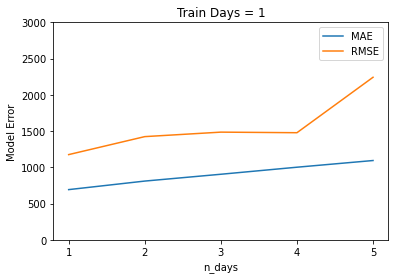

1 days:
R Squared Score: 0.9713
Root Mean Squared Error: 1133.00
Mean Absolute Error: 675.66

2 days:
R Squared Score: 0.9643
Root Mean Squared Error: 1278.80
Mean Absolute Error: 830.28

3 days:
R Squared Score: 0.9532
Root Mean Squared Error: 1467.32
Mean Absolute Error: 983.89

4 days:
R Squared Score: 0.9040
Root Mean Squared Error: 2186.85
Mean Absolute Error: 1033.45

5 days:
R Squared Score: 0.9293
Root Mean Squared Error: 1798.88
Mean Absolute Error: 994.91



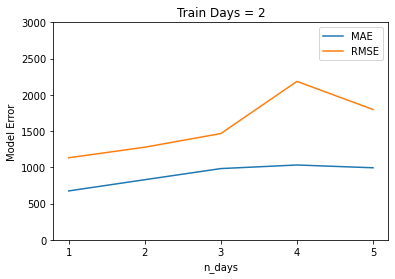

1 days:
R Squared Score: 0.9739
Root Mean Squared Error: 1091.78
Mean Absolute Error: 720.41

2 days:
R Squared Score: 0.9552
Root Mean Squared Error: 1435.80
Mean Absolute Error: 919.71

3 days:
R Squared Score: 0.9049
Root Mean Squared Error: 2177.19
Mean Absolute Error: 992.12

4 days:
R Squared Score: 0.9291
Root Mean Squared Error: 1801.64
Mean Absolute Error: 1001.39

5 days:
R Squared Score: 0.9647
Root Mean Squared Error: 1280.65
Mean Absolute Error: 852.24



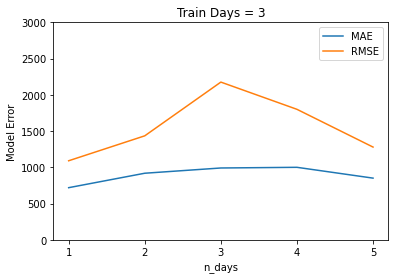

1 days:
R Squared Score: 0.9707
Root Mean Squared Error: 1160.55
Mean Absolute Error: 741.57

2 days:
R Squared Score: 0.9133
Root Mean Squared Error: 2078.75
Mean Absolute Error: 937.73

3 days:
R Squared Score: 0.9302
Root Mean Squared Error: 1787.45
Mean Absolute Error: 944.51

4 days:
R Squared Score: 0.9672
Root Mean Squared Error: 1234.24
Mean Absolute Error: 835.21

5 days:
R Squared Score: 0.9349
Root Mean Squared Error: 1708.04
Mean Absolute Error: 1006.27



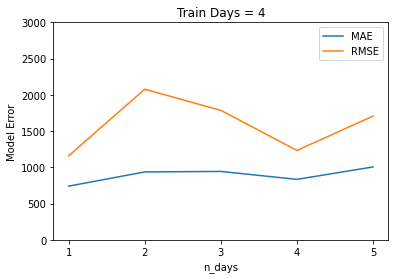

1 days:
R Squared Score: 0.9157
Root Mean Squared Error: 2049.99
Mean Absolute Error: 878.55

2 days:
R Squared Score: 0.9332
Root Mean Squared Error: 1748.97
Mean Absolute Error: 929.39

3 days:
R Squared Score: 0.9677
Root Mean Squared Error: 1224.92
Mean Absolute Error: 783.66

4 days:
R Squared Score: 0.9400
Root Mean Squared Error: 1640.05
Mean Absolute Error: 979.39

5 days:
R Squared Score: 0.9269
Root Mean Squared Error: 1780.62
Mean Absolute Error: 1017.39



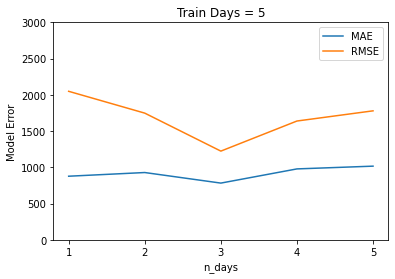

1 days:
R Squared Score: 0.9551
Root Mean Squared Error: 1433.97
Mean Absolute Error: 764.95

2 days:
R Squared Score: 0.9731
Root Mean Squared Error: 1117.97
Mean Absolute Error: 715.57

3 days:
R Squared Score: 0.9381
Root Mean Squared Error: 1665.95
Mean Absolute Error: 952.00

4 days:
R Squared Score: 0.9328
Root Mean Squared Error: 1707.59
Mean Absolute Error: 958.54

5 days:
R Squared Score: 0.9262
Root Mean Squared Error: 1869.28
Mean Absolute Error: 997.56



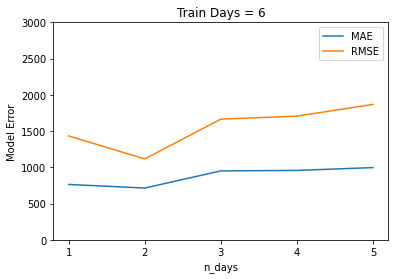

1 days:
R Squared Score: 0.9780
Root Mean Squared Error: 1011.20
Mean Absolute Error: 680.65

2 days:
R Squared Score: 0.9480
Root Mean Squared Error: 1526.84
Mean Absolute Error: 898.09

3 days:
R Squared Score: 0.9326
Root Mean Squared Error: 1709.61
Mean Absolute Error: 965.52

4 days:
R Squared Score: 0.9221
Root Mean Squared Error: 1920.08
Mean Absolute Error: 1049.33

5 days:
R Squared Score: 0.8475
Root Mean Squared Error: 2717.65
Mean Absolute Error: 1244.57



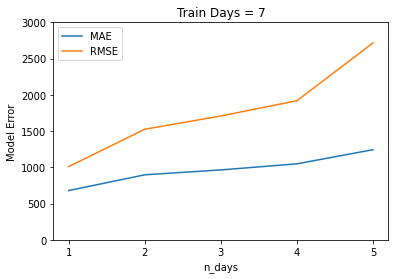

1 days:
R Squared Score: 0.9658
Root Mean Squared Error: 1237.53
Mean Absolute Error: 744.33

2 days:
R Squared Score: 0.9406
Root Mean Squared Error: 1605.44
Mean Absolute Error: 910.85

3 days:
R Squared Score: 0.9270
Root Mean Squared Error: 1858.62
Mean Absolute Error: 976.38

4 days:
R Squared Score: 0.8489
Root Mean Squared Error: 2705.10
Mean Absolute Error: 1213.61

5 days:
R Squared Score: 0.8872
Root Mean Squared Error: 2272.61
Mean Absolute Error: 1199.83



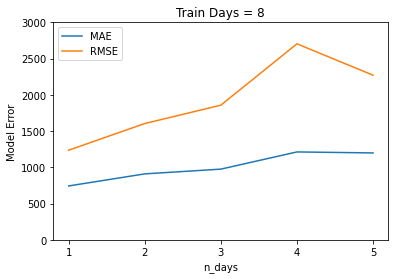

1 days:
R Squared Score: 0.9611
Root Mean Squared Error: 1298.14
Mean Absolute Error: 776.46

2 days:
R Squared Score: 0.9463
Root Mean Squared Error: 1594.20
Mean Absolute Error: 857.34

3 days:
R Squared Score: 0.8507
Root Mean Squared Error: 2689.22
Mean Absolute Error: 1205.55

4 days:
R Squared Score: 0.8874
Root Mean Squared Error: 2269.77
Mean Absolute Error: 1184.19

5 days:
R Squared Score: 0.8691
Root Mean Squared Error: 2459.02
Mean Absolute Error: 1247.87



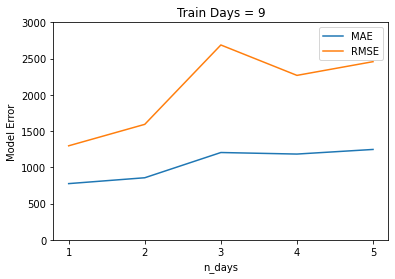

1 days:
R Squared Score: 0.9576
Root Mean Squared Error: 1416.57
Mean Absolute Error: 836.57

2 days:
R Squared Score: 0.8696
Root Mean Squared Error: 2513.21
Mean Absolute Error: 1127.48

3 days:
R Squared Score: 0.8883
Root Mean Squared Error: 2260.85
Mean Absolute Error: 1123.37

4 days:
R Squared Score: 0.8648
Root Mean Squared Error: 2498.98
Mean Absolute Error: 1229.96

5 days:
R Squared Score: 0.9193
Root Mean Squared Error: 1993.61
Mean Absolute Error: 1019.64



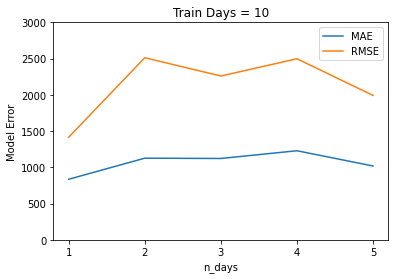

In [9]:
testErrors(model = GradientBoostingRegressor())

In [10]:
groupby = daily.groupby('date').describe()
groupby.head()

Total Power (max)                                     \
                       count mean  std  min  25%  50%  75%  max   
date                                                              
2019-03-01              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-02              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-03              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-04              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2019-03-05              24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           Total Power (avg)       ... HourlyWetBulbTemperature        \
                       count mean  ...                      75%   max   
date                               ...                                  
2019-03-01              24.0  0.0  ...                    28.00  31.0   
2019-03-02              24.0  0.0  ...                    31.00  32.0   
2019-03-03              24.0  0.0  ...                    26.00  27.0   
2019-03-04              24.0  0.0  ...                    18.25  23.0   
2019-03-05              24.0  0.0  ...                    14.00  15.0   

           HourlyRelativeHumidity                                           \
                            count       mean        std   min    25%   50%   
date                                                                         
2019-03-01                   24.0  66.625000  10.503881  44.0  60.25  70.0   
2019-03-02                   24.0  79.041667   6.772574  64.0  75.00  82.0   
2019-03-03                   24.0  70.666667  11.675566  51.0  59.50  75.0   
2019-03-04                   24.0  64.291667  11.547554  50.0  54.75  61.5   
2019-03-05                   24.0  61.916667   9.249755  47.0  53.50  63.5   

                         
              75%   max  
date                     
2019-03-01  75.00  81.0  
2019-03-02  85.00  85.0  
2019-03-03  78.75  85.0  
2019-03-04  71.75  84.0  
2019-03-05  70.00  74.0  

[5 rows x 40 columns]

In [10]:
endDate = pd.to_datetime('2021-01-01').date()
newSplit = resetDaily()[0]

train = newSplit[(newSplit['date'] < endDate)]
test = newSplit[(newSplit['date'] >= endDate)]

R Squared Score: 0.9748
Root Mean Squared Error: 1081.85
Mean Absolute Error: 703.53


In [12]:
dropCols = ['date', 'Total Power (max)']
X_test = test.drop(columns = dropCols)
X_train = train.drop(columns = dropCols)

Y_test = test['Total Power (max)']
Y_train = train['Total Power (max)']

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

rsq = rf.score(X_test, Y_test)
rmse = math.sqrt(metrics.mean_squared_error(Y_test, rf.predict(X_test)))
mae = metrics.mean_absolute_error(Y_test, rf.predict(X_test))

print("R Squared Score: {:.4f}".format(rsq))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("Mean Absolute Error: {:.2f}".format(mae))

R Squared Score: 0.5530
Root Mean Squared Error: 663.51
Mean Absolute Error: 307.07


In [11]:
train = newSplit[(newSplit['date'] < endDate)]
test = newSplit[(newSplit['date'] >= endDate)]

dropCols = ['date', 'Total Power (max)']
X_test = test.drop(columns = dropCols)
X_train = train.drop(columns = dropCols)

Y_test = test['Total Power (max)']
Y_train = train['Total Power (max)']

# Set lower and upper quantile
LOWER_ALPHA = 0.075
UPPER_ALPHA = 0.925
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

# Fit models
lower_model.fit(X_train, Y_train)
mid_model.fit(X_train, Y_train)
upper_model.fit(X_train, Y_train)
# Record actual values on test set
predictions = pd.DataFrame(Y_test)
# Predict
test['lower'] = lower_model.predict(X_test)
test['mid'] = mid_model.predict(X_test)
test['upper'] = upper_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [12]:
test

,date,Total Power (max),min_HourlyDryBulbTemperature,max_HourlyDryBulbTemperature,mean_HourlyDryBulbTemperature,min_HourlyWetBulbTemperature,max_HourlyWetBulbTemperature,mean_HourlyWetBulbTemperature,min_HourlyRelativeHumidity,max_HourlyRelativeHumidity,...,Total Power (max)-2day,Total Power (max)-3day,Total Power (max)-4day,Total Power (max)-5day,Total Power (max)-6day,Total Power (max)-7day,weekday,lower,mid,upper
672,2021-01-01,1580.678345,25.0,35.0,31.500000,24.0,33.0,29.625000,64.0,100.0,...,1735.346924,1696.960327,1794.340942,1773.476807,1802.968994,1699.894409,4,1507.698224,1552.692034,2319.852890
673,2021-01-02,1500.211914,32.0,37.0,33.875000,31.0,36.0,32.916667,79.0,100.0,...,1666.328979,1735.346924,1696.960327,1794.340942,1773.476807,1802.968994,5,1082.088067,1036.547318,2263.055765
674,2021-01-03,1557.887573,32.0,36.0,33.458333,30.0,35.0,32.416667,82.0,100.0,...,1580.678345,1666.328979,1735.346924,1696.960327,1794.340942,1773.476807,6,1147.909247,1036.547318,1884.585238
675,2021-01-04,1563.424194,33.0,34.0,33.375000,32.0,34.0,32.500000,85.0,97.0,...,1500.211914,1580.678345,1666.328979,1735.346924,1696.960327,1794.340942,0,1069.519012,1063.858460,3003.824593
676,2021-01-05,1562.737549,32.0,35.0,33.041667,31.0,34.0,32.375000,82.0,97.0,...,1557.887573,1500.211914,1580.678345,1666.328979,1735.346924,1696.960327,1,1072.037266,1056.646754,2277.242858
677,2021-01-06,2.272034,32.0,34.0,32.375000,29.0,32.0,30.875000,72.0,96.0,...,1563.424194,1557.887573,1500.211914,1580.678345,1666.328979,1735.346924,2,427.734738,538.496615,2726.128181
678,2021-01-07,1.645660,28.0,31.0,29.500000,26.0,29.0,27.500000,75.0,82.0,...,1562.737549,1563.424194,1557.887573,1500.211914,1580.678345,1666.328979,3,-42.857647,271.592023,1863.440266
679,2021-01-08,2022.115356,19.0,29.0,24.166667,18.0,27.0,23.000000,78.0,96.0,...,2.272034,1562.737549,1563.424194,1557.887573,1500.211914,1580.678345,4,-43.681301,161.037742,552.439552
680,2021-01-09,1934.027466,17.0,37.0,26.541667,16.0,30.0,23.666667,42.0,95.0,...,1.645660,2.272034,1562.737549,1563.424194,1557.887573,1500.211914,5,959.316637,820.333350,767.594550
681,2021-01-10,1937.009521,21.0,34.0,27.791667,20.0,31.0,26.166667,72.0,96.0,...,2022.115356,1.645660,2.272034,1562.737549,1563.424194,1557.887573,6,1437.294208,1556.869716,1998.797827


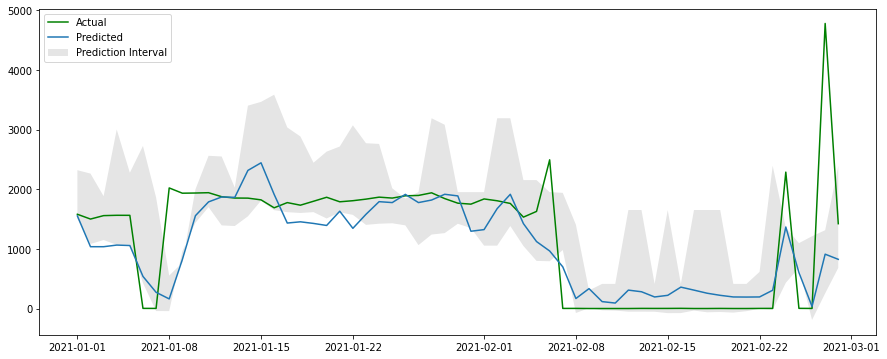

In [13]:
plt.figure(figsize = (15,6))
plt.plot(test['date'], test['Total Power (max)'], label = 'Actual', color = 'green')
plt.plot(test['date'], test['mid'], label = 'Predicted')
#plt.plot(test['date'], test['upper'], label = 'upper')
#plt.plot(test['date'], test['lower'], label = 'lower')
plt.fill_between(test['date'], test['upper'], test['lower'], facecolor='black',
                alpha=0.1, label = 'Prediction Interval')
plt.legend()
plt.show()

In [15]:
(abs(test['Total Power (max)'] - test['mid'])).mean()

414.5435550490188

In [16]:
newSplit = resetDaily()[0]
newSplit

R Squared Score: 0.9770
Root Mean Squared Error: 1033.33
Mean Absolute Error: 695.40


,date,Total Power (max),min_HourlyDryBulbTemperature,max_HourlyDryBulbTemperature,mean_HourlyDryBulbTemperature,min_HourlyWetBulbTemperature,max_HourlyWetBulbTemperature,mean_HourlyWetBulbTemperature,min_HourlyRelativeHumidity,max_HourlyRelativeHumidity,...,Total Power (avg)-6day,Total Power (avg)-7day,Total Power (max)-1day,Total Power (max)-2day,Total Power (max)-3day,Total Power (max)-4day,Total Power (max)-5day,Total Power (max)-6day,Total Power (max)-7day,weekday
8,2019-03-09,0.000000,9.0,38.0,25.791667,8.0,30.0,21.583333,39.0,81.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
9,2019-03-10,2141.060791,37.0,43.0,40.043478,34.0,39.0,36.173913,41.0,86.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
10,2019-03-11,1883.990845,31.0,37.0,34.708333,27.0,33.0,30.541667,52.0,75.0,...,0.000000,0.000000,2141.060791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
11,2019-03-12,0.000000,28.0,37.0,31.250000,25.0,31.0,27.000000,48.0,69.0,...,0.000000,0.000000,1883.990845,2141.060791,0.000000,0.000000,0.000000,0.000000,0.000000,1
12,2019-03-13,1452.281250,24.0,46.0,36.708333,22.0,37.0,31.083333,38.0,77.0,...,0.000000,0.000000,0.000000,1883.990845,2141.060791,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-02-24,2287.482666,28.0,52.0,39.791667,28.0,44.0,35.541667,40.0,96.0,...,0.000000,0.000000,2.056619,1.546389,0.000000,0.000000,1.452482,0.000000,0.000000,2
727,2021-02-25,2.623183,25.0,35.0,30.750000,23.0,31.0,27.291667,42.0,85.0,...,0.011715,0.000000,2287.482666,2.056619,1.546389,0.000000,0.000000,1.452482,0.000000,3
728,2021-02-26,1.191052,24.0,38.0,30.666667,22.0,31.0,26.750000,41.0,88.0,...,0.000000,0.011715,2.623183,2287.482666,2.056619,1.546389,0.000000,0.000000,1.452482,4
729,2021-02-27,4780.646973,30.0,44.0,37.833333,29.0,41.0,35.041667,54.0,92.0,...,0.000000,0.000000,1.191052,2.623183,2287.482666,2.056619,1.546389,0.000000,0.000000,5


In [17]:
def slidingWindow(dayInterval = 30, significance = 0.85):
    # Set lower and upper quantile
    LOWER_ALPHA = (1 - significance)/2
    UPPER_ALPHA = 1-(1-significance)/2
    # Each model has to be separate
    lower_model = GradientBoostingRegressor(loss="quantile",                   
                                            alpha=LOWER_ALPHA)
    # The mid model will use the default loss
    mid_model = GradientBoostingRegressor(loss="ls")
    upper_model = GradientBoostingRegressor(loss="quantile",
                                            alpha=UPPER_ALPHA)
    
    newSplit = resetDaily()[0]
    newSplit = newSplit[newSplit['Total Power (max)'] < 22000].dropna().reset_index(drop = True)
    newDf = newSplit.copy()
    newDf['lower'] = np.nan
    newDf['mid'] = np.nan
    newDf['upper'] = np.nan

    for i in range(0, len(newDf),dayInterval):
        try:
            train = newSplit.drop(index = list(range(i,i+dayInterval)))
            test = pd.DataFrame(newSplit.loc[list(range(i,i+dayInterval))])

            dropCols = ['date', 'Total Power (max)']
            X_test = test.drop(columns = dropCols)
            X_train = train.drop(columns = dropCols)

            Y_test = test['Total Power (max)']
            Y_train = train['Total Power (max)']

            # Fit models
            lower_model.fit(X_train, Y_train)
            mid_model.fit(X_train, Y_train)
            upper_model.fit(X_train, Y_train)

            newDf.at[list(range(i,i+dayInterval)), 'lower'] = lower_model.predict(X_test)
            newDf.at[list(range(i,i+dayInterval)), 'mid'] = mid_model.predict(X_test)
            newDf.at[list(range(i,i+dayInterval)), 'upper'] = upper_model.predict(X_test)
        except:
            print('error')

        print(i)
        
    print(abs(newDf['mid'] - newDf['Total Power (max)']).mean())
    return newDf.dropna()

In [18]:
newDf = slidingWindow(dayInterval = 30, significance = .9)

R Squared Score: 0.9778
Root Mean Squared Error: 1016.34
Mean Absolute Error: 685.64
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
error
720
836.7775305960431


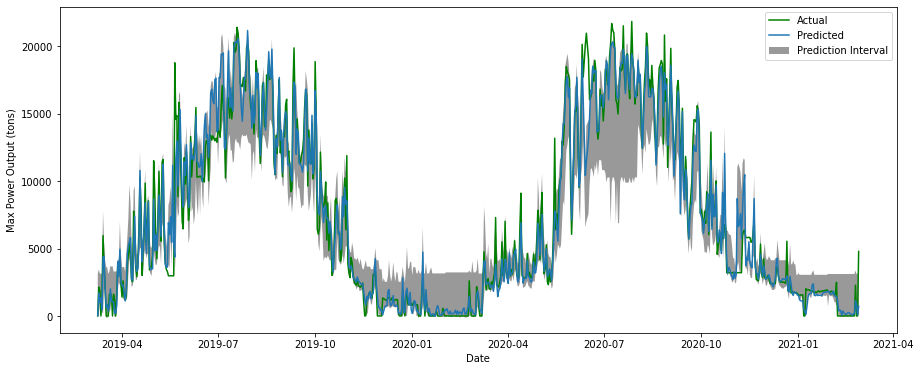

In [19]:
plt.figure(figsize = (15,6))
plt.plot(newDf['date'], newDf['Total Power (max)'], label = 'Actual', color = 'green')
plt.plot(newDf['date'], newDf['mid'], label = 'Predicted')
#plt.plot(newDf['date'], newDf['upper'], label = 'upper')
#plt.plot(newDf['date'], newDf['lower'], label = 'lower')
plt.fill_between(newDf['date'], newDf['upper'], newDf['lower'], facecolor='black',
                alpha=0.4, label = 'Prediction Interval')
plt.legend()
plt.ylabel('Max Power Output (tons)')
plt.xlabel('Date')
plt.show()

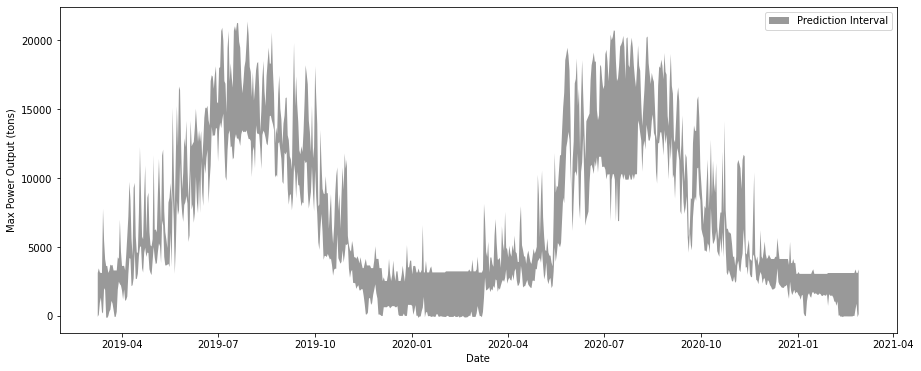

In [20]:
plt.figure(figsize = (15,6))
plt.fill_between(newDf['date'], newDf['upper'], newDf['lower'], facecolor='black',
                alpha=0.4, label = 'Prediction Interval')
plt.legend()
plt.ylabel('Max Power Output (tons)')
plt.xlabel('Date')
plt.show()

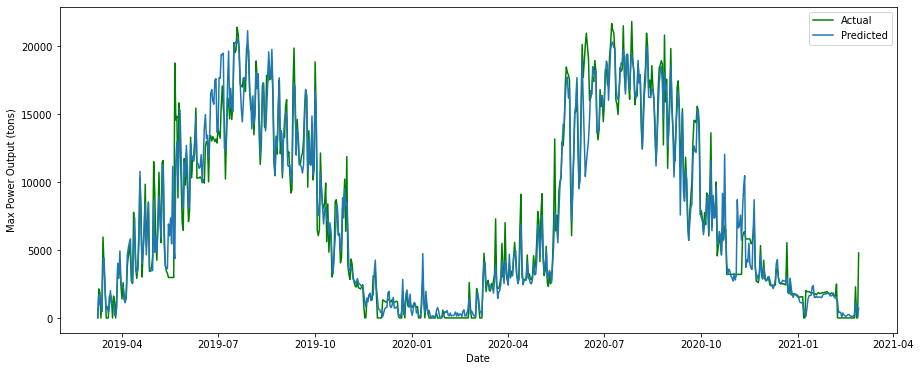

In [29]:
plt.figure(figsize = (15,6))
plt.plot(newDf['date'], newDf['Total Power (max)'], label = 'Actual', color = 'green')
plt.plot(newDf['date'], newDf['mid'], label = 'Predicted')

plt.legend()
plt.ylabel('Max Power Output (tons)')
plt.xlabel('Date')
plt.show()

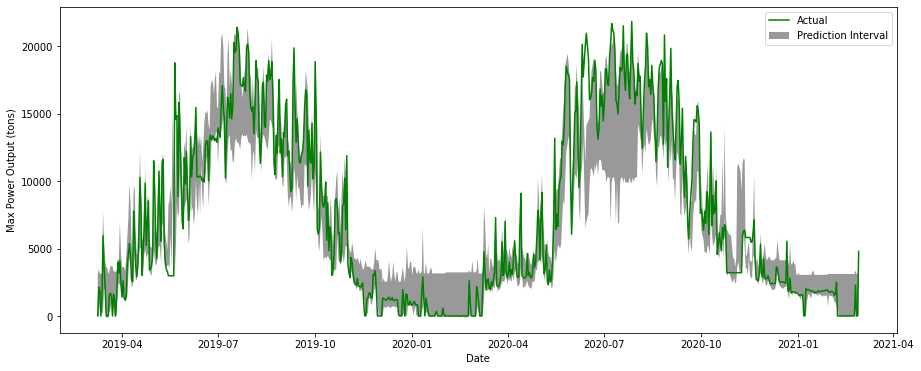

In [22]:
plt.figure(figsize = (15,6))
plt.plot(newDf['date'], newDf['Total Power (max)'], label = 'Actual', color = 'green')

#plt.plot(newDf['date'], newDf['upper'], label = 'upper')
#plt.plot(newDf['date'], newDf['lower'], label = 'lower')
plt.fill_between(newDf['date'], newDf['upper'], newDf['lower'], facecolor='black',
                alpha=0.4, label = 'Prediction Interval')
plt.legend()
plt.ylabel('Max Power Output (tons)')
plt.xlabel('Date')
plt.show()